<h2>FIN5622 Project #5
    <p class="text-primary">Loan Default Prediction with Neural Networks</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will build a neural network model to predict borrower defaults on a set of loan performance data.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_5_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import tensorflow as tf
print("TensorFlow version:", tf.__version__) #Check Tensorflow version is at least 2.8!

TensorFlow version: 2.8.0


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in the dataset "loan_performance_data_2016.csv" into a dataframe called <code>loans</code> using the pandas <code>pd.read_csv()</code> function. Check that there are 405,180 loans present in the dataframe.
    <br><br>
    Note that there are 16 feature columns and 1 target column (i.e. "loan_default") in this dataset. Please review the file "Loan_Data_Dictionary.xlsx" for definitions on each column.
    <p style="text-align:right;">[0pts]</p>
    </div>
</div>

In [2]:
loans = pd.read_csv('loan_performance_data_2016.csv')
loan_target = ['loan_default']
loan_features = loans.drop('loan_default', axis = 1).columns.tolist()
loans

,loan_amnt,loan_term,int_rate,fico,dti,annual_income,income_verification,home_mortgage,home_own,home_rent,debt_consolidation,coborrower,num_accounts,revol_bal,revol_util,derogatory_records,loan_default
0,7.200,3.0,5.32,750,19.05,49.0,0,1,0,0,1,0,11,9.309,18.4,0,0
1,12.000,5.0,11.99,670,6.59,49.0,0,1,0,0,0,0,10,12.152,50.6,0,1
2,11.425,3.0,19.53,730,35.56,26.0,0,0,0,1,0,0,11,2.096,7.2,0,0
3,17.500,3.0,13.67,665,38.29,46.0,0,0,0,1,1,0,33,18.847,62.6,0,0
4,22.875,5.0,17.27,670,11.75,65.0,0,0,0,1,1,0,6,25.200,90.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405175,16.000,5.0,12.79,665,12.25,150.0,0,0,0,1,0,0,12,7.700,55.0,1,0
405176,24.000,5.0,12.79,665,19.61,95.0,0,1,0,0,0,0,5,49.431,84.4,0,0
405177,40.000,5.0,10.49,705,12.75,227.0,1,1,0,0,0,0,5,8.633,64.9,0,0
405178,24.000,5.0,14.49,660,18.30,110.0,0,0,0,1,1,0,10,17.641,68.1,1,1


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Use the function <code>train_test_split()</code> from the <code>sklearn.model_selection</code> module to split <code>loans</code> into training and test datasets. Provide the function with 2 separate numpy arrays, storing the features and target separately (like we did in class). Additionally, set the following optional paramters for the function to the values listed below:
    <ul>
        <li><code>test_size = .2</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    <br>
    The function should return 4 outputs, representing the features and target for the training and test datasets, and store them as numpy arrays in variables called <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>. The training data should contain 80%, while the test data should contain 20%, of the original <code>loans</code> dataset. 
    <br><br>
    <b>Convert the four numpy arrays into tensors, using the function <code>tf.convert_to_tensor()</code> from the tensorflow library.</b>
    <br><br>
    Check that each tensor shoud have the following shapes: 
    <ul>
        <li><code>X_train.shape = (324144, 16)</code></li>
        <li><code>X_test.shape = (81036, 16)</code></li>
        <li><code>y_train.shape = (324144,)</code></li>
        <li><code>y_test.shape = (81036,)</code></li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    loans[loan_features], loans[loan_target], test_size = 0.20, random_state = 5622)

In [4]:
X_train = tf.convert_to_tensor(X_train)

In [5]:
X_test = tf.convert_to_tensor(X_test)

In [6]:
y_train = tf.convert_to_tensor(y_train)

In [7]:
y_test = tf.convert_to_tensor(y_test)

In [8]:
X_train.shape

TensorShape([324144, 16])

In [9]:
X_test.shape

TensorShape([81036, 16])

In [10]:
y_train.shape

TensorShape([324144, 1])

In [11]:
y_test.shape 

TensorShape([81036, 1])

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Create a neural network model with the following architecture (recall this is done using the tensor flow function <code>tf.keras.models.Sequential()</code>), and store this in a variable called <code>nnet_model_1</code>:
    <ul>
        <li>A normalization layer with means and standard deviations populated by the training data <code>X_train</code>. The tensorflow function to create the normalization layer is <code>tf.keras.layers.Normalization(axis = -1)</code> and the <code>.adapt()</code> method.</li>
        <li>A hidden layer with 64 nodes and ReLU activation function. The tensorflow function to create a fully connected layer is <code>tf.keras.layers.Dense()</code> with <code>activation = 'relu'</code>.</li>
        <li>A second hidden layer with 128 nodes and ReLU activation function.</li>
        <li>An output layer with 1 node, since we are only interested in predicting the probability of loan defaults. We will not apply the sigmoid activation function yet, until after training is complete.</li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [12]:
normalization_layer = tf.keras.layers.Normalization(axis = -1)
normalization_layer.adapt(X_train)

nnet_model_1 = tf.keras.models.Sequential([
    normalization_layer,
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(1),
])

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Configure the tensorflow model compilier for <code>nnet_model_1</code>, which will facilitate the training of our nueral network. Recall that this is done by calling the <code>.compile()</code> method of the neural network model object. 
    <br><br>
    The two parameters we will need to configure in are:
    <ul>
        <li><code>loss</code>: Since we are training a classification model to make binary class predictions, the tensorflow loss function to use here is <code>tf.keras.losses.BinaryCrossentropy(from_logits = True)</code> (Recall that this is equivalent to log-likelihood). </li>
        <li><code>optimizer</code>: Set Stochastic Gradient Decent (SGD) as the optimizer (tensorflow function is <code>ts.keras.optimizers.SGD()</code>. Set the learning rate equal to 0.1.</li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [13]:
loss_fx = tf.keras.losses.BinaryCrossentropy(from_logits = True)
opt = tf.keras.optimizers.SGD(learning_rate = .1)

nnet_model_1.compile(optimizer = opt, loss = loss_fx)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
     Train the neural network. Recall that this is done by calling the <code>.fit()</code> method of the neural network model object. Provide the method with the training data (<code>X_train</code> and <code>y_train</code>), as well as the following additional parameters:
    <ul>
        <li><code>validation_data = (X_test, y_test)</code>: this allows for the evaluation of model performance on the test data during training.</li>
        <li><code>epochs = 10</code>: trains the model on 10 passes of the training data.</li>
        <li><code>shuffle = True</code>: shuffles the training data in between each epoch.</li>
        <li><code>batch_size = 100</code>: sets the batch size to 100 samples under each iteration.</li>
    </ul>
    Plot both the training loss and test loss on a single line plot. Label the axes and provide a legend. Your plot should look similar to below:

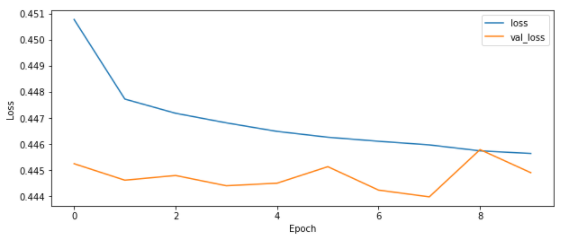
    <br>
    Based on the plot of training and test loss, did the neural network successful learn from the training data?
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [14]:
history = nnet_model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10,
                          shuffle = True, batch_size = 100)

Epoch 1/10
3242/3242 [==============================] - 14s 3ms/step - loss: 0.4516 - val_loss: 0.4453
Epoch 2/10
3242/3242 [==============================] - 11s 3ms/step - loss: 0.4487 - val_loss: 0.4447
Epoch 3/10
3242/3242 [==============================] - 11s 3ms/step - loss: 0.4481 - val_loss: 0.4445
Epoch 4/10
3242/3242 [==============================] - 9s 3ms/step - loss: 0.4477 - val_loss: 0.4447
Epoch 5/10
3242/3242 [==============================] - 8s 3ms/step - loss: 0.4474 - val_loss: 0.4442
Epoch 6/10
3242/3242 [==============================] - 8s 3ms/step - loss: 0.4472 - val_loss: 0.4447
Epoch 7/10
3242/3242 [==============================] - 8s 3ms/step - loss: 0.4469 - val_loss: 0.4441
Epoch 8/10
3242/3242 [==============================] - 9s 3ms/step - loss: 0.4467 - val_loss: 0.4444
Epoch 9/10
3242/3242 [==============================] - 8s 3ms/step - loss: 0.4468 - val_loss: 0.4443
Epoch 10/10
3242/3242 [==============================] - 8s 3ms/step - loss: 0.

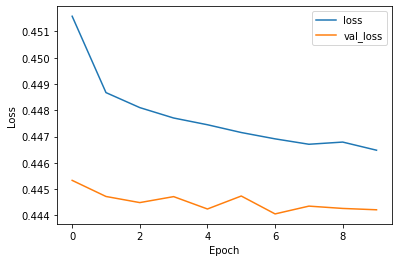

In [15]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on the plot of training and test loss, the neural network was successful in learning from the training data as the loss and val_loss values conitnue to get closer to one another with each successive epoch. 


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Calculate and store the predictions from the neural network <code>nnet_model_1</code> on the test dataset <code>X_test</code> in a variable called <code>pred_1</code>. 
    <br><br>
    Because the last layer of the neural network <code>nnet_model_1</code> is still a dense layer, the outputs of the model are still logits (linear combination of the output layer weights and last hidden layer features). Transform <code>pred_1</code> into probabilities using the tensorflow function <code>tf.nn.sigmoid()</code>. <b>Store this as a numpy array in a variable called <code>prob_1</code>.</b>
    <br><br>
    Recall, use the <code>.numpy()</code> method to turn tensors into numpy arrays.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [16]:
pred_1 = nnet_model_1(X_test)
prob_1 = tf.nn.sigmoid(pred_1).numpy()
prob_1

array([[0.2271218 ],
       [0.22786453],
       [0.31272572],
       ...,
       [0.10830709],
       [0.23444769],
       [0.18252414]], dtype=float32)

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Calculate the ROC curve and the AUC for <code>probs_1</code>. Recall that the ROC curve can be calculated using the function <code>roc_curve()</code>, and the AUC can be calculated using the function <code>roc_auc_score()</code>. Both functions are from the <code>sklearn.metrics</code> module.
    <br><br>
    Plot the ROC curve on a line plot. Recall that the ROC curve should be a upward-sloping and concaved curve above the 45-degree line. Provide axis labels and a title for the plot.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

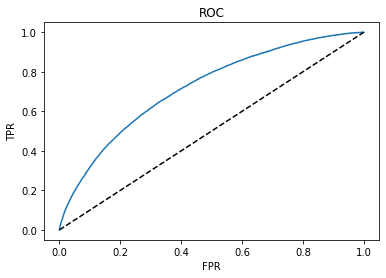

In [17]:
fpr, tpr, th = roc_curve(y_test, prob_1)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'black')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC')
plt.show()

In [18]:
roc_auc_score(y_test, prob_1)

0.7190588091599402

In [19]:
prob_1.mean(), y_test.numpy().mean()

(0.20025562, 0.1950614541685177)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Extra Credit</b>
    </div>
    <div class = "panel-body"> 
    Create a neural network model with the following architecture and store this in a variable called <code>nnet_model_2</code>:
    <ul>
        <li>A normalization layer with means and standard deviations populated by the training data <code>X_train</code>.</li>
        <li>A hidden layer with 128 nodes and ReLU activation function, and apply dropout with 10% probability.</li>
        <li>A second hidden layer with 256 nodes and ReLU activation function, and apply dropout with 10% probability.</li>
        <li>A third hidden layer with 256 nodes and ReLU activation function, and apply dropout with 10% probability.</li>
        <li>An output layer with 1 node, since we are only interested in predicting the probability of loan defaults. We will not apply the sigmoid activation function yet, until after training is complete.</li>
    </ul>
    Configure the tensorflow model compilier for <code>nnet_model_2</code>, with the following specifications:
    <ul>
        <li><code>loss</code>: <code>tf.keras.losses.BinaryCrossentropy(from_logits = True)</code></li>
        <li><code>optimizer</code>: Use the Adam Optimization Algorithm as the optimizer (tensorflow function is <code>ts.keras.optimizers.Adam()</code>. Set the learning rate equal to 0.001.</li>
    </ul>
    Train the neural network on the training data (<code>X_train</code> and <code>y_train</code>). Set the following additional parameters in the <code>.fit()</code> method:
    <ul>
        <li><code>validation_data = (X_test, y_test)</code>: this allows for the evaluation of model performance on the test data during training.</li>
        <li><code>epochs = 20</code></li>
        <li><code>shuffle = True</code></li>
        <li><code>batch_size = 100</code></li>
    </ul>
    Plot both the training loss and test loss on a single line plot. Label the axes and provide a legend.
    <br><br>
    Use <code>nnet_model_2</code> to calculate the predicted probabilities of default for the test data (use a sigmoid activation function), and store those predictions in a variable called <code>probs_2</code>. Calculate the ROC curve and the AUC for <code>probs_2</code>, and plot the ROC curve on a line plot. Provide axis labels and a title for the plot.
    <br><br>
    Did <code>nnet_model_2</code> outperform <code>nnet_model_1</code>?
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>